<a href="https://colab.research.google.com/github/TheAmirHK/Temperature_analyzer/blob/main/Temperature_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from fitter import Fitter
import datetime

# In[] Trajectory to inforamtion excel file

url = 'https://github.com/TheAmirHK/Temperature_analyzer/raw/main/Test_set_from_1990_to_2023.xlsx'

In [2]:
# In[] Generate labels
def Date():

    """
    Generate a list of January dates between start_date and end_date.

    Args:
        start_date (datetime.date): The start date.
        end_date (datetime.date): The end date.

    Returns:
        A list of January dates formatted as strings in the format "Month day, Year".
    """
    # Define the start and end dates
    start_date = datetime.date(1990, 1, 1)
    end_date = datetime.date(2023, 2, 1)

    # Initialize an empty dictionary to hold the dates
    january_days = {}

    # Loop through each day from the start to the end date
    for d in range((end_date - start_date).days):
        current_date = start_date + datetime.timedelta(d)

        # Check if the current day is in January
        if current_date.month == 1:
            # Add the current day to the dictionary
            date_string = current_date.strftime("%B %d, %Y")
            january_days[date_string] = current_date.strftime("%A")
    keys_list = list(january_days.keys())
    return keys_list


In [3]:
# In[] Exteract the data
def read_and_extract_the_info (file_path):

    """
    Load the dataset from an Excel file.
    Extract the maximum temperature data from the dataset.

    Args:
        file_path (str): The path to the Excel file.

    Returns:
        A pandas Series containing the maximum temperature data.
    """

    dataset = pd.read_excel(file_path)
    dataset.loc[(dataset['Year'] >= 1990) & (dataset['Month'] ==1 ), 'Target_data'] = 'Target'
    Target_dataset = dataset[dataset['Target_data'] == 'Target']
    Target_dataset.index = Date()
    Target_dataset = Target_dataset.dropna()
    Maximum_temperature = Target_dataset.loc[:,"Maximum temperature (Degree C)"]
    return Maximum_temperature

In [4]:
# In[] Plot the data
def plot_histogram(data, bins=100):
    """
    Plot a histogram of the given data.

    Args:
        data (pandas.Series): The data to plot.
        bins (int): The number of bins to use in the histogram.
    """
    data = pd.DataFrame(Maximum_temperature, columns=["Maximum temperature (Degree C)"])
    data.hist(column='Maximum temperature (Degree C)', bins=bins, grid=True, sharex=False, zorder=20, rwidth=0.9)
    plt.title('Histogram of daily maximum temperature for the month of January observed at Melbourne Airport\n')
    plt.xlabel("Maximum temperature (Degree C)", labelpad=20, size=12)
    plt.ylabel("Frequency", labelpad=20, size=12)
    plt.show(block=False)

In [5]:
# In[] Find the asscociated quantile and exteract the data adn plot it
def extract_quantile_precentile(data, quantile):
    """
    Find the Tmax value at the given quantile.

    Args:
        data (pandas.Series): The data to search.
        quantile (float): The quantile value.

    Returns:
        Print Tmax value at the given quantile and plot the quantile.
    """
    quantile = data.quantile(quantile)
    data_for_quantile = data.loc[data >= quantile]
    max_Tmax = max(data_for_quantile)
    plt.figure("Tmax at 95th percentile")
    data_for_quantile.plot.bar(rot=90, style='o-', grid=True)
    plt.axhline(y = max_Tmax, color = 'black', linestyle = '--', label = "Maximum Tmax")
    plt.ylabel('Tmax (Degree C)')
    plt.legend(loc='upper right')
    print("+ What would be the Tmax at 95th percentile?")
    print("- The Tmax at 95th percentile is {:.2f}" .format(max_Tmax))
    plt.show(block=False)

In [6]:
# In[] Evaluate the mean and standard deviation
def statistics(data):
    """
    Calculates the mean and standard deviation of the input data.

    Args:
    data (array-like): The data for which to calculate the mean and standard deviation.

    Returns:
    tuple: A tuple containing the mean and standard deviation of the input data.
    """
    mu, std = norm.fit(Maximum_temperature)
    print('\n + What is the mean and standard deviation of the daily temperature?')
    print("- The mean is {:.2f} and standard deviation is equal to {:.2f}\n".format(mu, std))
    return mu, std

In [7]:
# In[] Fit a normal distribution to data
def fit_a_distribution(data):
    """
    Fits multiple normal distribution to the input data, pick the best fitter and displays a summary of the fitting results.

    Parameters:
    data (pandas.Series): The input data to fit the distribution to.

    Returns:
    None
    """
    plt.figure("Data norm")

    f = Fitter(data,
               distributions=[ 'exponnorm',
                                'foldnorm',
                                'gennorm',
                                'halfgennorm',
                                'halfnorm',
                                'lognorm',
                                'norm',
                                'norminvgauss',
                                'powerlognorm',
                                'powernorm',
                                'skewnorm',
                                'truncnorm'])
    f.fit()
    best_fit = f.get_best(method = 'sumsquare_error')
    print ("best fitter", best_fit)

    test = list(best_fit.keys())

    best_fitter = Fitter(data,
                         distributions = test )
    best_fitter.fit()
    best_fitter.summary(plot=True)
    plt.show(block=False)


In [8]:
# In[] Find the asscociated quantile and exteract the data
Maximum_temperature = read_and_extract_the_info(url)

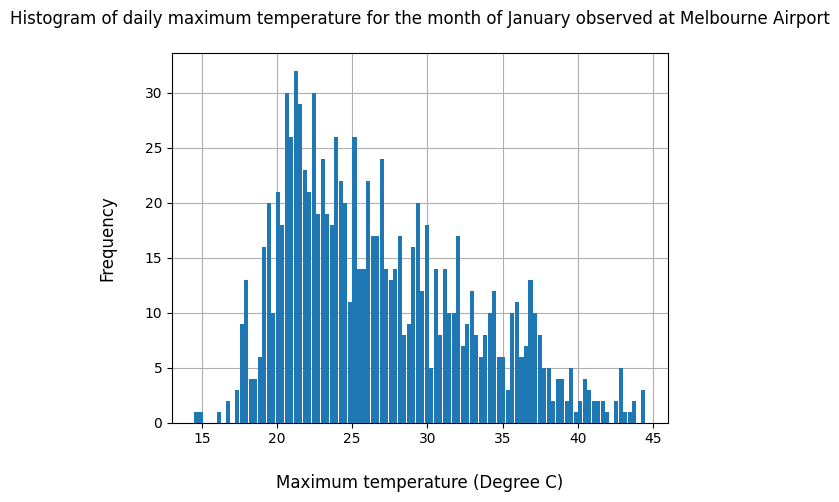

In [9]:
plot_histogram(Maximum_temperature)

+ What would be the Tmax at 95th percentile?
- The Tmax at 95th percentile is 44.50


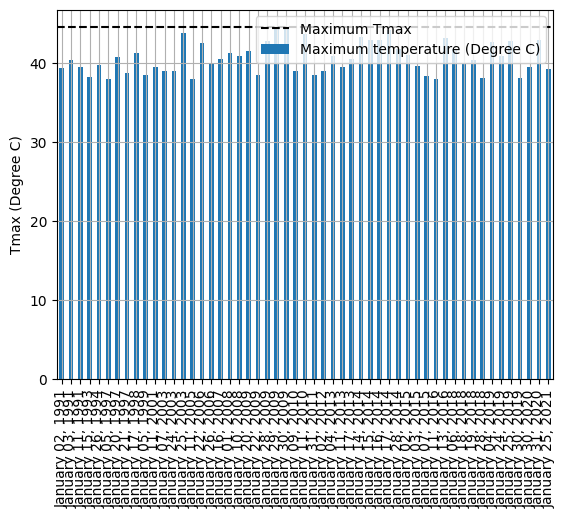

In [10]:
extract_quantile_precentile(Maximum_temperature, 0.95)

In [11]:
statistics(Maximum_temperature)


 + What is the mean and standard deviation of the daily temperature?
- The mean is 26.79 and standard deviation is equal to 6.07



(26.79280230326296, 6.072021043765049)

best fitter {'skewnorm': {'a': 6.393997286440997, 'loc': 18.928131941244448, 'scale': 9.93591829733623}}


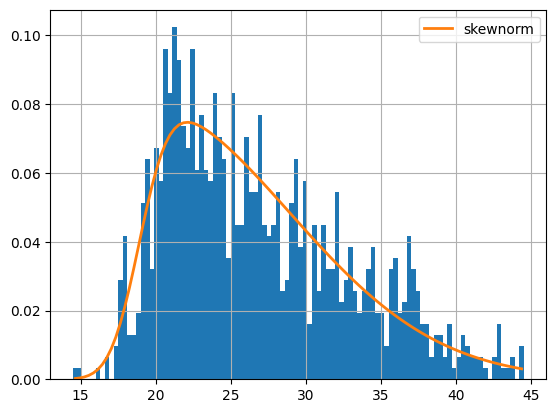

In [12]:
fit_a_distribution(Maximum_temperature)